In [454]:
from datetime import date, datetime, timedelta

from binance.binance_k_line_repository import load_k_lines

interval_days = 18
interval_minutes = interval_days * 24 * 60
interval_date_from: date = date.today() - timedelta(days=3 + interval_days - 1)
interval_date_to: date = date.today() - timedelta(days=3)

symbol: str = "ETHUSDT"

raw_k_lines = load_k_lines(symbol, interval_date_from, interval_date_to)

display(raw_k_lines)

,open_timestamp_millis,open_price,high_price,low_price,close_price,volume,close_timestamp_millis,quote_asset_volume,trades_count,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,1684022400000,1794.44,1794.70,1793.71,1794.00,1981.500,1684022459999,3.555092e+06,1406,1088.145,1.952234e+06,0
1,1684022460000,1794.01,1795.75,1793.89,1795.52,2597.836,1684022519999,4.663045e+06,1698,2286.289,4.103865e+06,0
2,1684022520000,1795.52,1795.53,1794.55,1795.16,1267.372,1684022579999,2.274981e+06,1289,696.497,1.250176e+06,0
3,1684022580000,1795.17,1795.30,1794.46,1794.73,1421.120,1684022639999,2.550783e+06,1286,618.413,1.109982e+06,0
4,1684022640000,1794.73,1794.74,1794.38,1794.38,382.667,1684022699999,6.867137e+05,651,99.304,1.781987e+05,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1685577300000,1873.17,1874.41,1873.08,1874.41,4202.478,1685577359999,7.873024e+06,1590,2667.404,4.997601e+06,0
1436,1685577360000,1874.40,1874.41,1872.54,1872.80,3444.416,1685577419999,6.454170e+06,1565,401.812,7.527455e+05,0
1437,1685577420000,1872.81,1873.44,1872.64,1872.84,1423.699,1685577479999,2.666499e+06,1428,820.822,1.537314e+06,0
1438,1685577480000,1872.84,1872.95,1872.53,1872.83,820.012,1685577539999,1.535584e+06,910,353.406,6.618053e+05,0


In [455]:
import pandas as pd

k_lines = raw_k_lines[["close_price"]]
k_lines.index = pd.to_datetime(raw_k_lines["open_timestamp_millis"], unit="ms")
k_lines.index.name = "open_datetime"

k_lines

,close_price
open_datetime,
2023-05-14 00:00:00,1794.00
2023-05-14 00:01:00,1795.52
2023-05-14 00:02:00,1795.16
2023-05-14 00:03:00,1794.73
2023-05-14 00:04:00,1794.38
...,...
2023-05-31 23:55:00,1874.41
2023-05-31 23:56:00,1872.80
2023-05-31 23:57:00,1872.84


In [456]:
from numpy import float16, float64

# TODO: revivce disabled validations

# assert len(k_lines) == interval_minutes

assert len(k_lines[k_lines.isna().any(axis=1)]) == 0
assert len(k_lines[k_lines.isnull().any(axis=1)]) == 0

assert k_lines.dtypes["close_price"] == float64
assert len(k_lines[k_lines["close_price"] <= 0]) == 0

# display(
#     (
#     (k_lines.index.to_series() - k_lines.index.to_series().shift(1))
#     .iloc[1:]
#     .dt.total_seconds()
#     ).value_counts()

# )

# assert (
#     (k_lines.index.to_series() - k_lines.index.to_series().shift(1))
#     .iloc[1:]
#     .dt.total_seconds()
#     == 60
# ).all()

<Axes: xlabel='open_datetime'>

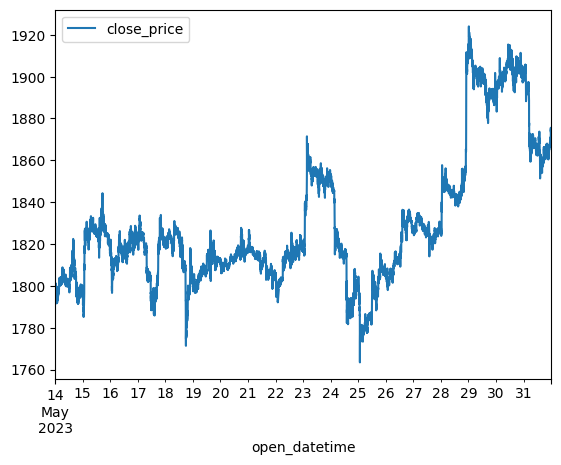

In [457]:
k_lines.plot.line(use_index=True)

In [458]:
k_lines_features = k_lines.copy()

k_lines_features["previous_close_price_mean_1_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(1).mean()
    / k_lines_features["close_price"]
)
k_lines_features["previous_close_price_mean_2_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(2).mean()
    / k_lines_features["close_price"]
)
k_lines_features["previous_close_price_mean_4_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(4).mean()
    / k_lines_features["close_price"]
)
k_lines_features["previous_close_price_mean_8_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(8).mean()
    / k_lines_features["close_price"]
)
k_lines_features["previous_close_price_mean_16_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(16).mean()
    / k_lines_features["close_price"]
)

k_lines_features["previous_close_price_std_2_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(2).std()
    / k_lines_features["close_price"]
)
k_lines_features["previous_close_price_std_4_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(4).std()
    / k_lines_features["close_price"]
)
k_lines_features["previous_close_price_std_8_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(8).std()
    / k_lines_features["close_price"]
)
k_lines_features["previous_close_price_std_16_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(16).std()
    / k_lines_features["close_price"]
)

k_lines_features["previous_close_price_min_2_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(2).min()
    / k_lines_features["close_price"]
)
k_lines_features["previous_close_price_min_4_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(4).min()
    / k_lines_features["close_price"]
)
k_lines_features["previous_close_price_min_8_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(8).min()
    / k_lines_features["close_price"]
)
k_lines_features["previous_close_price_min_16_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(16).min()
    / k_lines_features["close_price"]
)

k_lines_features["previous_close_price_max_2_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(2).max()
    / k_lines_features["close_price"]
)
k_lines_features["previous_close_price_max_4_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(4).max()
    / k_lines_features["close_price"]
)
k_lines_features["previous_close_price_max_8_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(8).max()
    / k_lines_features["close_price"]
)
k_lines_features["previous_close_price_max_16_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(16).max()
    / k_lines_features["close_price"]
)


k_lines_features["is_next_close_price_greater"] = (
    k_lines_features["close_price"]
    .shift(-1)
    .rolling(2)
    .apply(lambda x: x.iloc[1] > x.iloc[0])
)

k_lines_features.dropna(inplace=True)

display(k_lines_features)

,close_price,previous_close_price_mean_1_ratio,previous_close_price_mean_2_ratio,previous_close_price_mean_4_ratio,previous_close_price_mean_8_ratio,previous_close_price_mean_16_ratio,previous_close_price_std_2_ratio,previous_close_price_std_4_ratio,previous_close_price_std_8_ratio,previous_close_price_std_16_ratio,previous_close_price_min_2_ratio,previous_close_price_min_4_ratio,previous_close_price_min_8_ratio,previous_close_price_min_16_ratio,previous_close_price_max_2_ratio,previous_close_price_max_4_ratio,previous_close_price_max_8_ratio,previous_close_price_max_16_ratio,is_next_close_price_greater
open_datetime,,,,,,,,,,,,,,,,,,,
2023-05-14 00:16:00,1795.82,0.999972,0.999850,1.000024,0.999512,0.999379,0.000173,0.000276,0.000630,0.000509,0.999727,0.999727,0.998424,0.998424,0.999972,1.000395,1.000395,1.000395,0.0
2023-05-14 00:17:00,1794.87,1.000529,1.000515,1.000454,1.000151,0.999972,0.000020,0.000133,0.000628,0.000520,1.000501,1.000256,0.998953,0.998953,1.000529,1.000529,1.000925,1.000925,0.0
2023-05-14 00:18:00,1794.64,1.000128,1.000393,1.000450,1.000310,1.000077,0.000374,0.000247,0.000612,0.000510,1.000128,1.000128,0.999081,0.999081,1.000658,1.000658,1.001053,1.001053,0.0
2023-05-14 00:19:00,1794.36,1.000156,1.000220,1.000510,1.000581,1.000215,0.000091,0.000339,0.000397,0.000507,1.000156,1.000156,1.000045,0.999236,1.000284,1.000814,1.001209,1.001209,1.0
2023-05-14 00:20:00,1795.89,0.999148,0.999226,0.999461,0.999723,0.999350,0.000110,0.000353,0.000405,0.000510,0.999148,0.999148,0.999148,0.998385,0.999304,0.999961,1.000356,1.000356,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-31 23:54:00,1873.18,1.000016,1.000096,1.000312,1.000352,0.999961,0.000113,0.000374,0.000310,0.000927,1.000016,1.000016,1.000016,0.998350,1.000176,1.000860,1.000860,1.001265,1.0
2023-05-31 23:55:00,1874.41,0.999344,0.999352,0.999441,0.999595,0.999408,0.000011,0.000104,0.000269,0.000821,0.999344,0.999344,0.999344,0.998031,0.999360,0.999541,1.000203,1.000608,0.0
2023-05-31 23:56:00,1872.80,1.000860,1.000531,1.000415,1.000505,1.000390,0.000464,0.000307,0.000305,0.000746,1.000203,1.000203,1.000203,0.998889,1.000860,1.000860,1.001063,1.001468,1.0


In [459]:
test_k_lines_ratio = 0.2
test_k_lines_count = round(test_k_lines_ratio * len(k_lines_features))

train_k_lines_features = k_lines_features.iloc[:-test_k_lines_count]
test_k_lines_features = k_lines_features.iloc[-test_k_lines_count:]

display(train_k_lines_features)
display(test_k_lines_features)

,close_price,previous_close_price_mean_1_ratio,previous_close_price_mean_2_ratio,previous_close_price_mean_4_ratio,previous_close_price_mean_8_ratio,previous_close_price_mean_16_ratio,previous_close_price_std_2_ratio,previous_close_price_std_4_ratio,previous_close_price_std_8_ratio,previous_close_price_std_16_ratio,previous_close_price_min_2_ratio,previous_close_price_min_4_ratio,previous_close_price_min_8_ratio,previous_close_price_min_16_ratio,previous_close_price_max_2_ratio,previous_close_price_max_4_ratio,previous_close_price_max_8_ratio,previous_close_price_max_16_ratio,is_next_close_price_greater
open_datetime,,,,,,,,,,,,,,,,,,,
2023-05-14 00:16:00,1795.82,0.999972,0.999850,1.000024,0.999512,0.999379,0.000173,0.000276,0.000630,0.000509,0.999727,0.999727,0.998424,0.998424,0.999972,1.000395,1.000395,1.000395,0.0
2023-05-14 00:17:00,1794.87,1.000529,1.000515,1.000454,1.000151,0.999972,0.000020,0.000133,0.000628,0.000520,1.000501,1.000256,0.998953,0.998953,1.000529,1.000529,1.000925,1.000925,0.0
2023-05-14 00:18:00,1794.64,1.000128,1.000393,1.000450,1.000310,1.000077,0.000374,0.000247,0.000612,0.000510,1.000128,1.000128,0.999081,0.999081,1.000658,1.000658,1.001053,1.001053,0.0
2023-05-14 00:19:00,1794.36,1.000156,1.000220,1.000510,1.000581,1.000215,0.000091,0.000339,0.000397,0.000507,1.000156,1.000156,1.000045,0.999236,1.000284,1.000814,1.001209,1.001209,1.0
2023-05-14 00:20:00,1795.89,0.999148,0.999226,0.999461,0.999723,0.999350,0.000110,0.000353,0.000405,0.000510,0.999148,0.999148,0.999148,0.998385,0.999304,0.999961,1.000356,1.000356,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-28 09:33:00,1844.67,1.000184,1.000233,1.000412,1.000387,1.000171,0.000069,0.000213,0.000170,0.000289,1.000184,1.000184,1.000157,0.999691,1.000282,1.000634,1.000634,1.000634,0.0
2023-05-28 09:34:00,1844.60,1.000038,1.000130,1.000313,1.000365,1.000223,0.000130,0.000266,0.000212,0.000274,1.000038,1.000038,1.000038,0.999729,1.000222,1.000672,1.000672,1.000672,1.0
2023-05-28 09:35:00,1844.87,0.999854,0.999873,0.999999,1.000194,1.000094,0.000027,0.000152,0.000243,0.000248,0.999854,0.999854,0.999854,0.999669,0.999892,1.000173,1.000526,1.000526,0.0


,close_price,previous_close_price_mean_1_ratio,previous_close_price_mean_2_ratio,previous_close_price_mean_4_ratio,previous_close_price_mean_8_ratio,previous_close_price_mean_16_ratio,previous_close_price_std_2_ratio,previous_close_price_std_4_ratio,previous_close_price_std_8_ratio,previous_close_price_std_16_ratio,previous_close_price_min_2_ratio,previous_close_price_min_4_ratio,previous_close_price_min_8_ratio,previous_close_price_min_16_ratio,previous_close_price_max_2_ratio,previous_close_price_max_4_ratio,previous_close_price_max_8_ratio,previous_close_price_max_16_ratio,is_next_close_price_greater
open_datetime,,,,,,,,,,,,,,,,,,,
2023-05-28 09:38:00,1843.88,1.000309,1.000380,1.000422,1.000563,1.000648,0.000100,0.000096,0.000239,0.000228,1.000309,1.000309,1.000309,1.000309,1.000450,1.000537,1.001063,1.001063,1.0
2023-05-28 09:39:00,1843.89,0.999995,1.000149,1.000319,1.000424,1.000600,0.000219,0.000236,0.000215,0.000279,0.999995,0.999995,0.999995,0.999995,1.000304,1.000531,1.000705,1.001058,1.0
2023-05-28 09:40:00,1844.08,0.999897,0.999894,1.000083,1.000233,1.000456,0.000004,0.000225,0.000228,0.000316,0.999892,0.999892,0.999892,0.999892,0.999897,1.000342,1.000504,1.000954,0.0
2023-05-28 09:41:00,1843.51,1.000309,1.000258,1.000306,1.000479,1.000748,0.000073,0.000145,0.000212,0.000334,1.000206,1.000201,1.000201,1.000201,1.000309,1.000510,1.000738,1.001264,0.0
2023-05-28 09:42:00,1843.44,1.000038,1.000193,1.000217,1.000439,1.000716,0.000219,0.000129,0.000259,0.000367,1.000038,1.000038,1.000038,1.000038,1.000347,1.000347,1.000776,1.001302,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-31 23:54:00,1873.18,1.000016,1.000096,1.000312,1.000352,0.999961,0.000113,0.000374,0.000310,0.000927,1.000016,1.000016,1.000016,0.998350,1.000176,1.000860,1.000860,1.001265,1.0
2023-05-31 23:55:00,1874.41,0.999344,0.999352,0.999441,0.999595,0.999408,0.000011,0.000104,0.000269,0.000821,0.999344,0.999344,0.999344,0.998031,0.999360,0.999541,1.000203,1.000608,0.0
2023-05-31 23:56:00,1872.80,1.000860,1.000531,1.000415,1.000505,1.000390,0.000464,0.000307,0.000305,0.000746,1.000203,1.000203,1.000203,0.998889,1.000860,1.000860,1.001063,1.001468,1.0


In [460]:
from sklearn.ensemble import RandomForestClassifier

model_input_columns = [
    # "close_price",
    "previous_close_price_mean_1_ratio",
    "previous_close_price_mean_2_ratio",
    "previous_close_price_mean_4_ratio",
    "previous_close_price_mean_8_ratio",
    "previous_close_price_mean_16_ratio",
    "previous_close_price_std_2_ratio",
    "previous_close_price_std_4_ratio",
    "previous_close_price_std_8_ratio",
    "previous_close_price_std_16_ratio",
    "previous_close_price_min_2_ratio",
    "previous_close_price_min_4_ratio",
    "previous_close_price_min_8_ratio",
    "previous_close_price_min_16_ratio",
    "previous_close_price_max_2_ratio",
    "previous_close_price_max_4_ratio",
    "previous_close_price_max_8_ratio",
    "previous_close_price_max_16_ratio",
]
model_target_column = "is_next_close_price_greater"

model_train_input_values = train_k_lines_features[model_input_columns]
model_train_target_values = train_k_lines_features[model_target_column]
model_test_input_values = test_k_lines_features[model_input_columns]
model_test_target_values = test_k_lines_features[model_target_column]

model = RandomForestClassifier(
    n_estimators=100,
    min_samples_split=200,
    random_state=1,
)
model.fit(model_train_input_values, model_train_target_values)

model_test_predicted_values = pd.Series(
    model.predict(model_test_input_values), index=test_k_lines_features.index
)
model_train_predicted_values = pd.Series(
    model.predict(model_train_input_values), index=train_k_lines_features.index
)

model_test_predicted_values.name = f"predicted_{model_target_column}"
model_test_target_and_predicted_values = pd.concat(
    [model_test_target_values, model_test_predicted_values], axis=1
)
# display(model_test_target_and_predicted_values)

In [461]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

display(
    "test_accuracy_score = "
    + str(accuracy_score(model_test_target_values, model_test_predicted_values))
)

display(
    "train_accuracy_score = "
    + str(accuracy_score(model_train_target_values, model_train_predicted_values))
)

display(
    "test_precision_score = "
    + str(precision_score(model_test_target_values, model_test_predicted_values))
)

display(
    "train_precision_score = "
    + str(precision_score(model_train_target_values, model_train_predicted_values))
)


# display(precision_score(model_test_target_values, model_test_predicted_values))
# display(recall_score(model_test_target_values, model_test_predicted_values))
# display(f1_score(model_test_target_values, model_test_predicted_values))

'test_accuracy_score = 0.5180467091295117'

'train_accuracy_score = 0.7306727149889007'

'test_precision_score = 0.5191466083150985'

'train_precision_score = 0.7958659821669819'

In [462]:
display(
    pd.concat(
        [
            model_test_target_values.value_counts(),
            model_test_predicted_values.value_counts(),
        ],
        axis=1,
    )
)

,is_next_close_price_greater,predicted_is_next_close_price_greater
0.0,2614,3353
1.0,2567,1828
